In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel(r'E:\Imarticus\Capstone Project\Flight Price\Data_Train.xlsx')

In [3]:
test = pd.read_excel(r'E:\Imarticus\Capstone Project\Flight Price\Test_set.xlsx')

In [4]:
train.shape  # dimensions of treain dataset (10683 rows , 11 columns)

(10683, 11)

In [5]:
test.shape  # dimensions of test dataset (2671 rows , 10 columns)

(2671, 10)

We have 2 datasets here -- > **train and test**                                                                      
**train** dataset have **10683 rows and 11 columns** (10 independent variables and 1 dependent variable (price))                
**test** dataset have **2671 rows and 10 columns** (10 independent variables and we have to predict 'price' )

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data Description

1. **Airline**            : The name of the airline. 
2. **Date_of_Journey**    : The date of the journey
3. **Source**             : The source from which the service begins.
4. **Destination**        : The destination where the service ends.
5. **Route**              : The route taken by the flight to reach the destination.
6. **Dep_Time**           : The time when the journey starts from the source.
7. **Arrival_Time**       : Time of arrival at the destination.
8. **Duration**           : Total duration of the flight.
9. **Total_Stops**        : Total stops between the source and destination.
10. **Additional_Info**   : Additional information about the flight
11. **Price**             : The price of the ticket in Indian Rupees (INR)

## Defining Problem Statment

#### Create a predictive model which can preidict the Price of flight tickets in India (Domestic Flights)

• Target Variable :- Price

## Determine the type of Machine Learning 

Based on problem statment we can understand that we have to create a **Supervised Machine Learning Regression model** , as the
target variable is continous.

==============================================================================================================

## Firstly we will do preprocessing and EDA on train dataset.

## Lets check Distribution of target variable(price)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

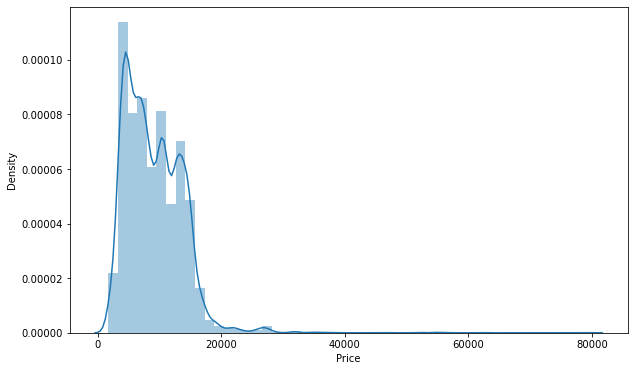

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(train.Price)

In [8]:
print('Maximum fligth fare is :- ',train.Price.max(),'INR') 
print('Minimum flight fare is :- ',train.Price.min(),'INR' )

Maximum fligth fare is :-  79512 INR
Minimum flight fare is :-  1759 INR


#### Observation from plot :- 

• So from distribution plot of Price column we can conclude that, most of the flights have tickets range of 1759 to 20000 INR.  
• There are some flights also who have tickets more than 20000 INR.

## Basic Data Exploration

This process helps to understand which types of data present in the dataset and identify how and which columns are Quantitative 
or Categorical, also helps to examine does this columns affects the target variable values.

In [9]:
# this 'info()' functions provides information of data type of each columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# "describe()" function provides statistical description details of dataset
train.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
# this "nunique()" function provides information of how much unique values in each columns
# As here, some columns have 5 or 6 unique value which means it is a catagorical column and more unique value represents continous and numeric column.
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

## Feature Engineering

some of the columns like journey_date , arrival_time, dept_time can not used deirectly for building ML model, however we have to
exctarct some information from them which can be use for ML problem.                               
We can extract day and month from journey_date column and time in hrs and min from arrivaal and dep time.

#### Treating the journey date

In [12]:
train.Date_of_Journey = train.Date_of_Journey.str.split('/')

In [13]:
train['Journey_day'] = train.Date_of_Journey.str[0].astype('int')
train['Journey_month'] = train.Date_of_Journey.str[1].astype('int')

# Now drop date of journy column
train = train.drop(['Date_of_Journey'] , axis=1)

Taking only day and month in consideration as all this data is of same year (2019)

#### Treating Departure time 

In [14]:
# extracting departure hours
train['dept_hrs'] = pd.to_datetime(train.Dep_Time).dt.hour

# extracting arrival minutes
train['dept_min'] = pd.to_datetime(train.Dep_Time).dt.minute

# Now drop dept_time column as it of no use now
train = train.drop(['Dep_Time'] , axis=1)

#### Treating Arrival time

Similarly we can extracting hrs and min from arrival time column

In [15]:
train['arrival_hrs'] = pd.to_datetime(train.Arrival_Time).dt.hour

# extracting arrival minutes
train['arival_min'] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now drop Arrival_Time column as it of no use now
train = train.drop(['Arrival_Time'] , axis=1)

#### Treating Duration column

In [16]:
# Duration means its differance between departure and arrival time

# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [17]:
train['duration_hrs'] = duration_hours
train['duration_min'] = duration_mins

In [18]:
#train.Duration = train.Duration.str.split(' ')

#train['duration_hrs'] = train.Duration.str[0]   #extracting duration hr
#train.duration_hrs = train.duration_hrs.str.rstrip('h')  # removing 'h' word from column
#train.duration_hrs = train.duration_hrs.fillna(0)  # replacing NaN values with 0 ( if duration is in minutes only then, hrs = 0)

#train['duration_min'] = train.Duration.str[1] # extracting duration minutes
#train.duration_min = train.duration_min.str.rstrip('m')  # removing 'm' word from this column
#train.duration_min = train.duration_min.fillna(0)  # replacing null with 0 (if duration has no minutes then , minutes = 0)

In [19]:
# Now drop Duration column as it is of no use now
train = train.drop(['Duration'] , axis=1)

In [20]:
#train.duration_hrs = train.duration_hrs.astype('int')
#train.duration_min = train.duration_min.astype('int')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Journey_day      10683 non-null  int32 
 8   Journey_month    10683 non-null  int32 
 9   dept_hrs         10683 non-null  int64 
 10  dept_min         10683 non-null  int64 
 11  arrival_hrs      10683 non-null  int64 
 12  arival_min       10683 non-null  int64 
 13  duration_hrs     10683 non-null  int64 
 14  duration_min     10683 non-null  int64 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.1+ MB


In [22]:
train.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

As we can see majority flights having **"no info"** in additional information column , so we have to remove that that columns because its doesnt impact on learning on our model.

In [23]:
train = train.drop(['Additional_Info'],axis=1)

#### Route column and total stop column gives the same information so we are now going to drop it

In [24]:
train = train.drop(['Route'] , axis=1)

## Visual Data Exploration Analysis

• Categorical Data --> Countplot                                                                                     
• Continous Data   --> Distribution plot

In [25]:
# creating a list of categorical and numerical columns.

categorical = ['Airline' , 'Source' , 'Destination' , 'Total_Stops']
numerical   = ['Journey_day' , 'Journey_month' , 'dept_hrs' , 'dept_min' , 'arrival_hrs' , 'arival_min' , 
              'duration_hrs' , 'duration_min']

#### Plotting Categorical data with countplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

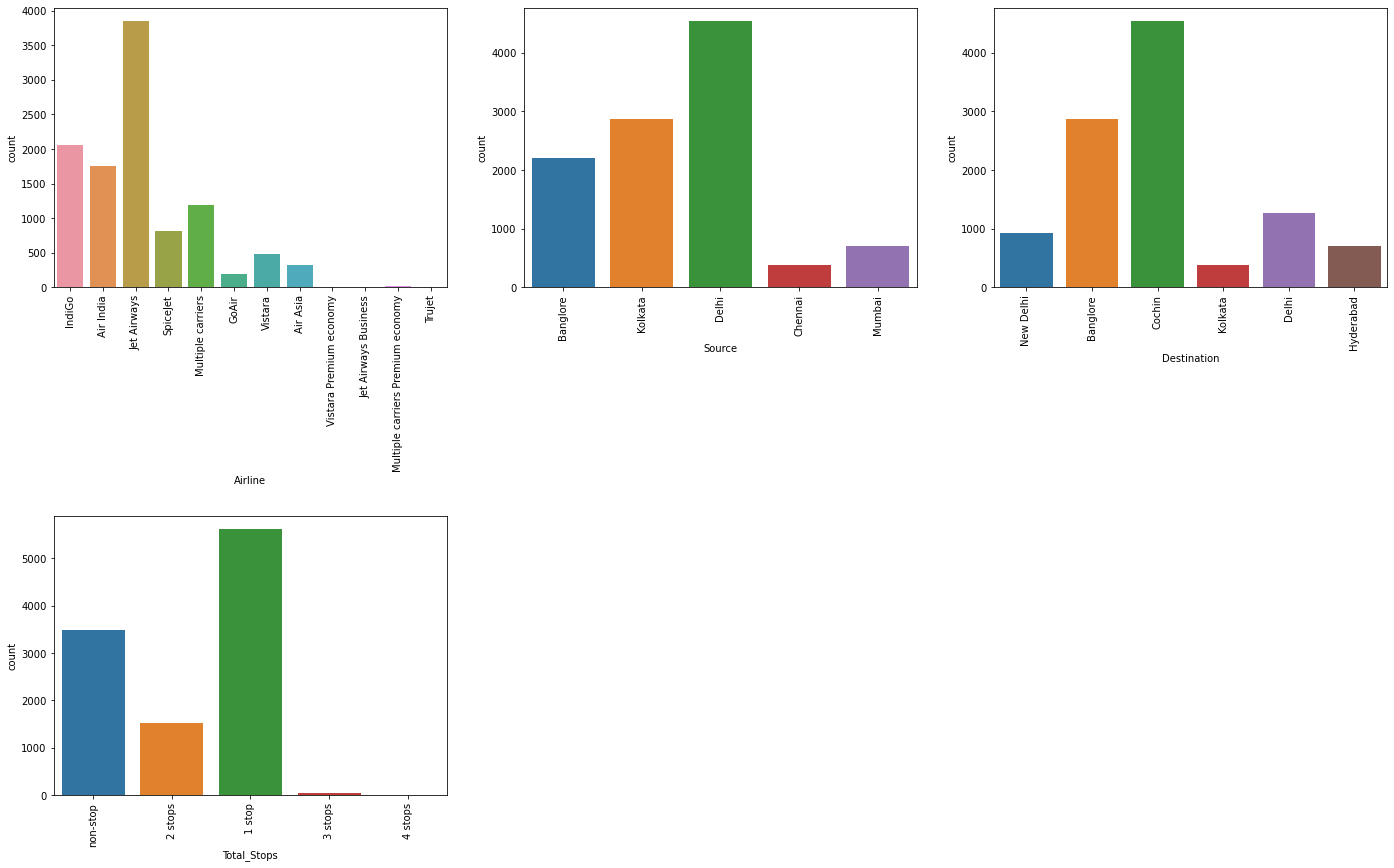

In [26]:
x=1
plt.figure(figsize=(20,40))

for c in categorical:
    plt.subplot(6,3,x)
    sns.countplot(train[c])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    x= x + 1
plt.show();

#### Observation made from above plot :-

**Airlines**                                                                                                 
•Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.                        
•Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.             

**Source**                                                                                                       
•Majority of the flights take off from Delhi.                                                                    
•Chennai has the minimum count of flight take-offs.                                                                   

**Destination**                                                                                                         
•Maximum flights land in Cochin.                                                                                   
•Kolkata has the lowest count of receiving the flights.                                                                                                                              

#### Plotting Numerical data with distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

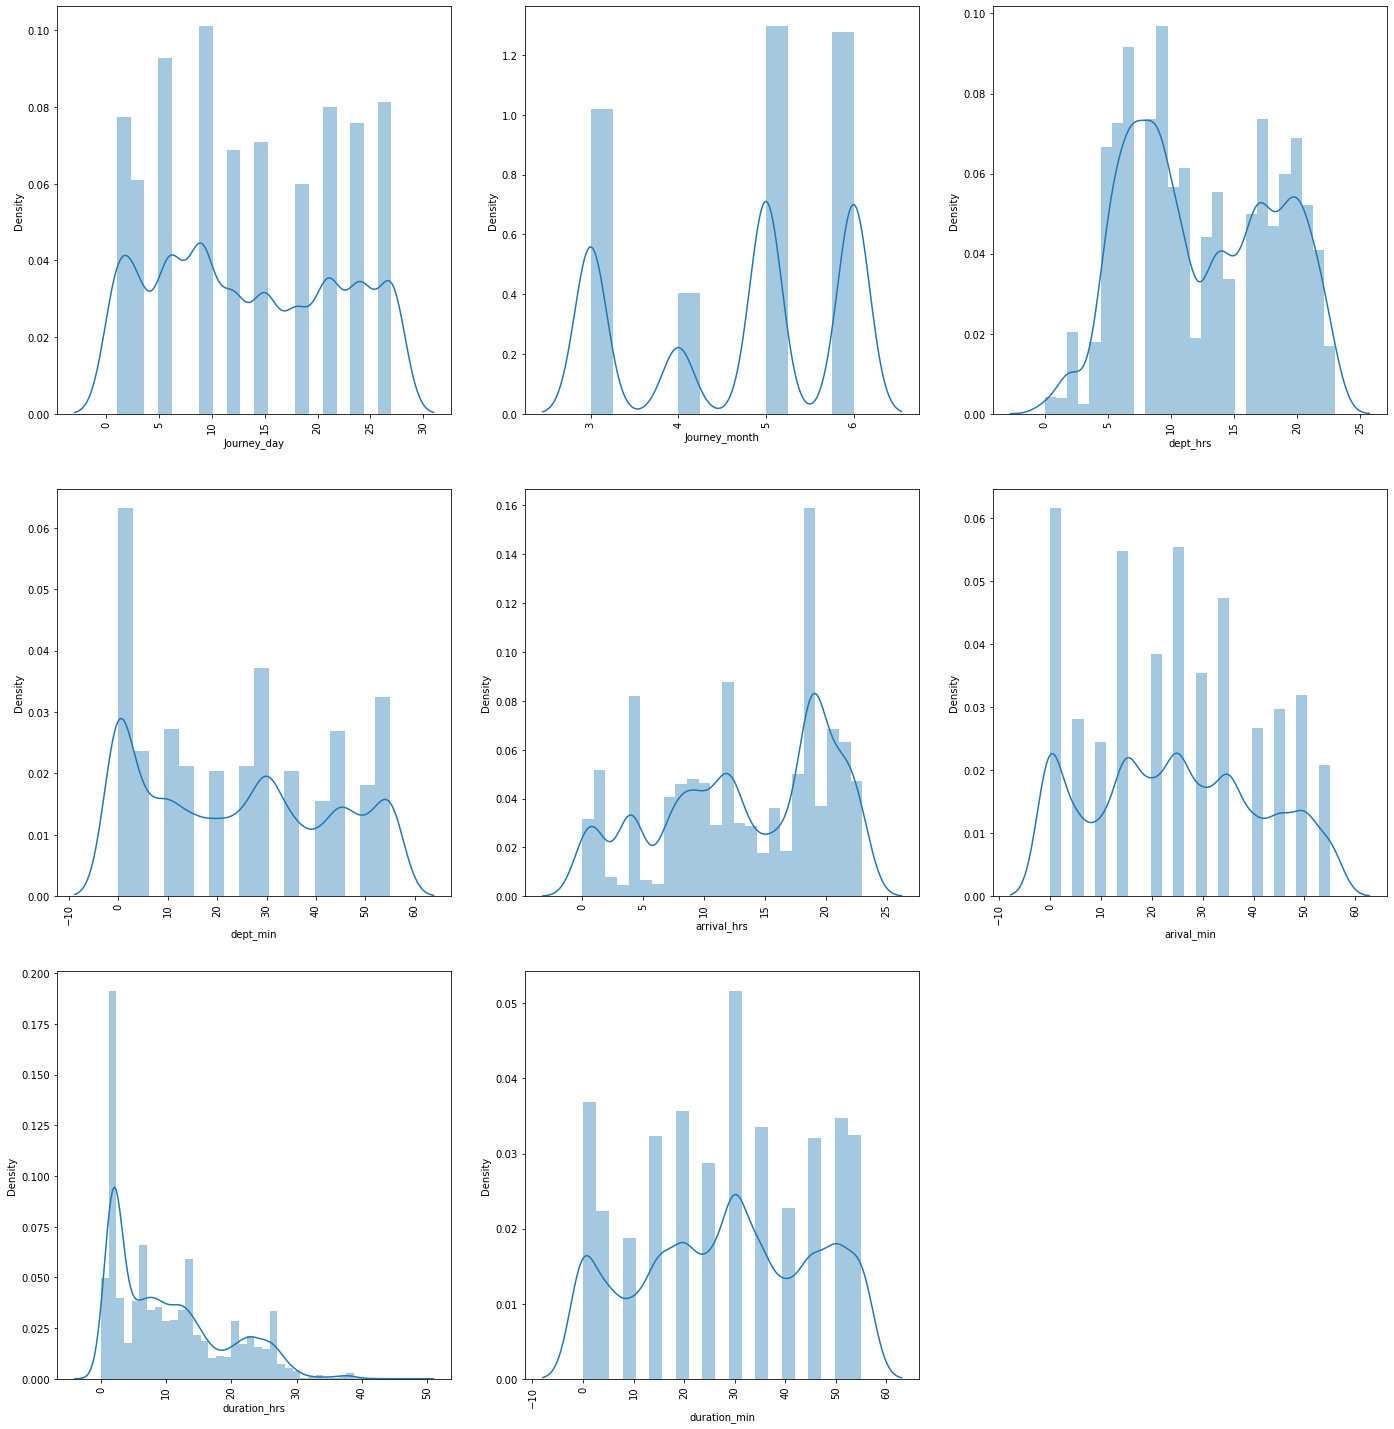

In [27]:
z=1
plt.figure(figsize=(20,40))

for c in numerical:
    plt.subplot(6,3,z)
    sns.distplot(train[c])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    z= z + 1
plt.show();

#### Observation made from the above plots :-

**Journey Day**                                                                                         
• There are no specific dates when the flights travel, the distribution is almost similar for all dates.

**Journey Month**                                                                                   
• Flights in May and June are more, it seems like people travel during holiday months.                                
• Flights in April are less.

**Dept_hrs**                                                                                       
• Most of the flilghts are depart in morning between 5 to 10.                                    
• After that flights are less departs in afternoon till 15 o'clock.                                             
• After 15 o'clock, flights departs are again rises.                                                                

**Dept_min**                                                                                                       
• The distribution is almost similar                                                                    

**Arrival_hrs**                                                                                                             
• Most of flights are reaching to their destination on 18 to 19 hrs.                              
• Most flights take-off in morning thats why they are reaches their destination at evening.

**Arrival_min**                                                                                                    
• Flights are arrives at whole hours.                                                                                      
• The distribution is almost similar.

**duration_hrs**                                                                                                    
• Most of the flights have duaration of 2-5 hrs.                                                                                
• Also some of flights have duaration of 30 hrs also, this probably happened due to more number of stops.


## Now, we are comparing independent categorical variables with dependent variable (Price)

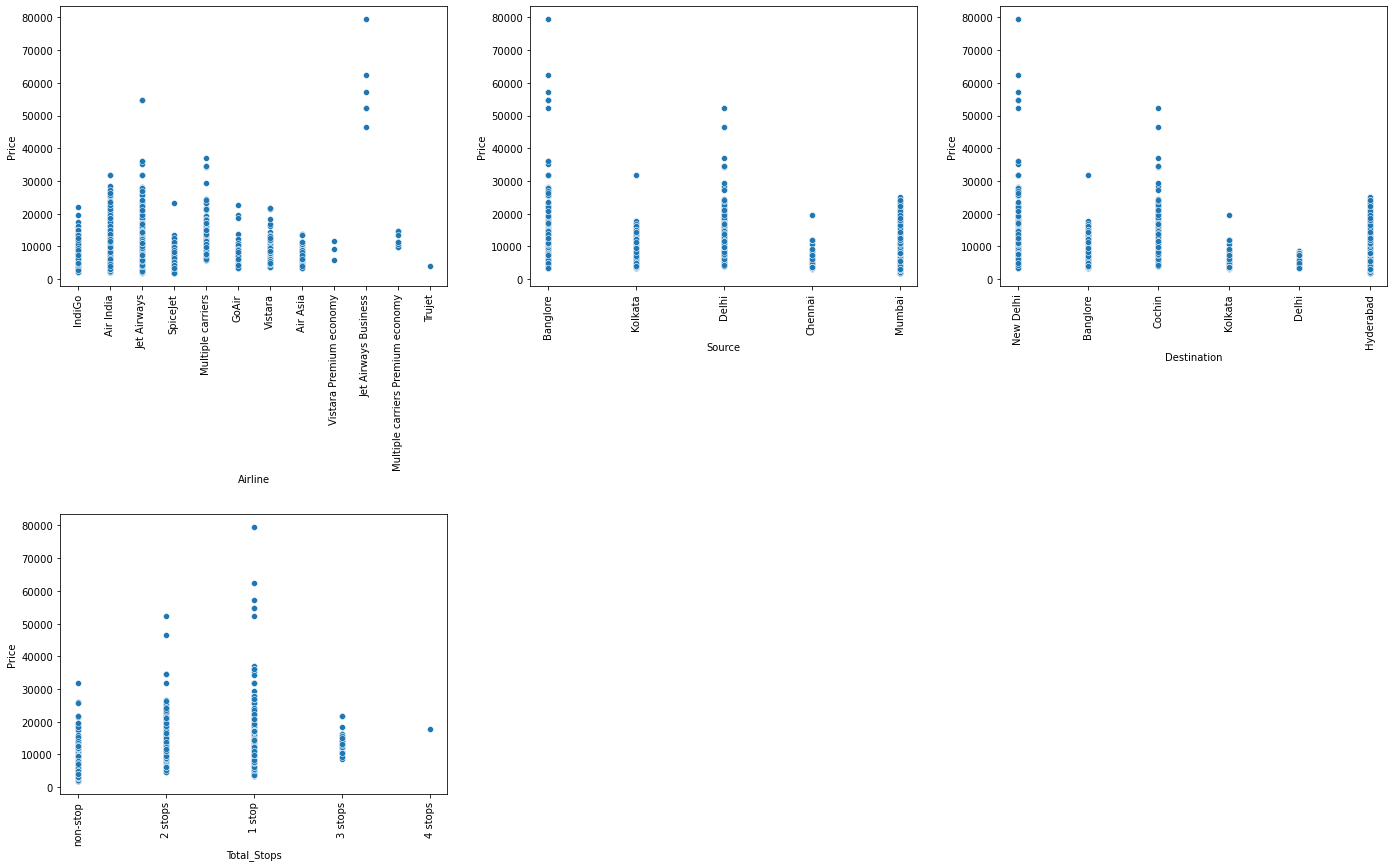

In [28]:
x=1
plt.figure(figsize=(20,40))

for c in categorical:
    plt.subplot(6,3,x)
    sns.scatterplot(x = train[c] , y = train.Price , marker = 'o')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    x= x + 1
plt.show()

#### Observation made from above plots:-

• Jet airways business class has the highest prices between 45k — 80k.   

• All the high cost flights depart from bangalore, rest of the flights have prices between 2k — 50k.          

• All high cost flights have destination as Delhi, rest of the flights have prices between 2k — 50k.      

• Some of flights which having 1-stop have higher price between 50k - 80k.

## Now, lets comapre independent numeric variable with dependent variable(Price)

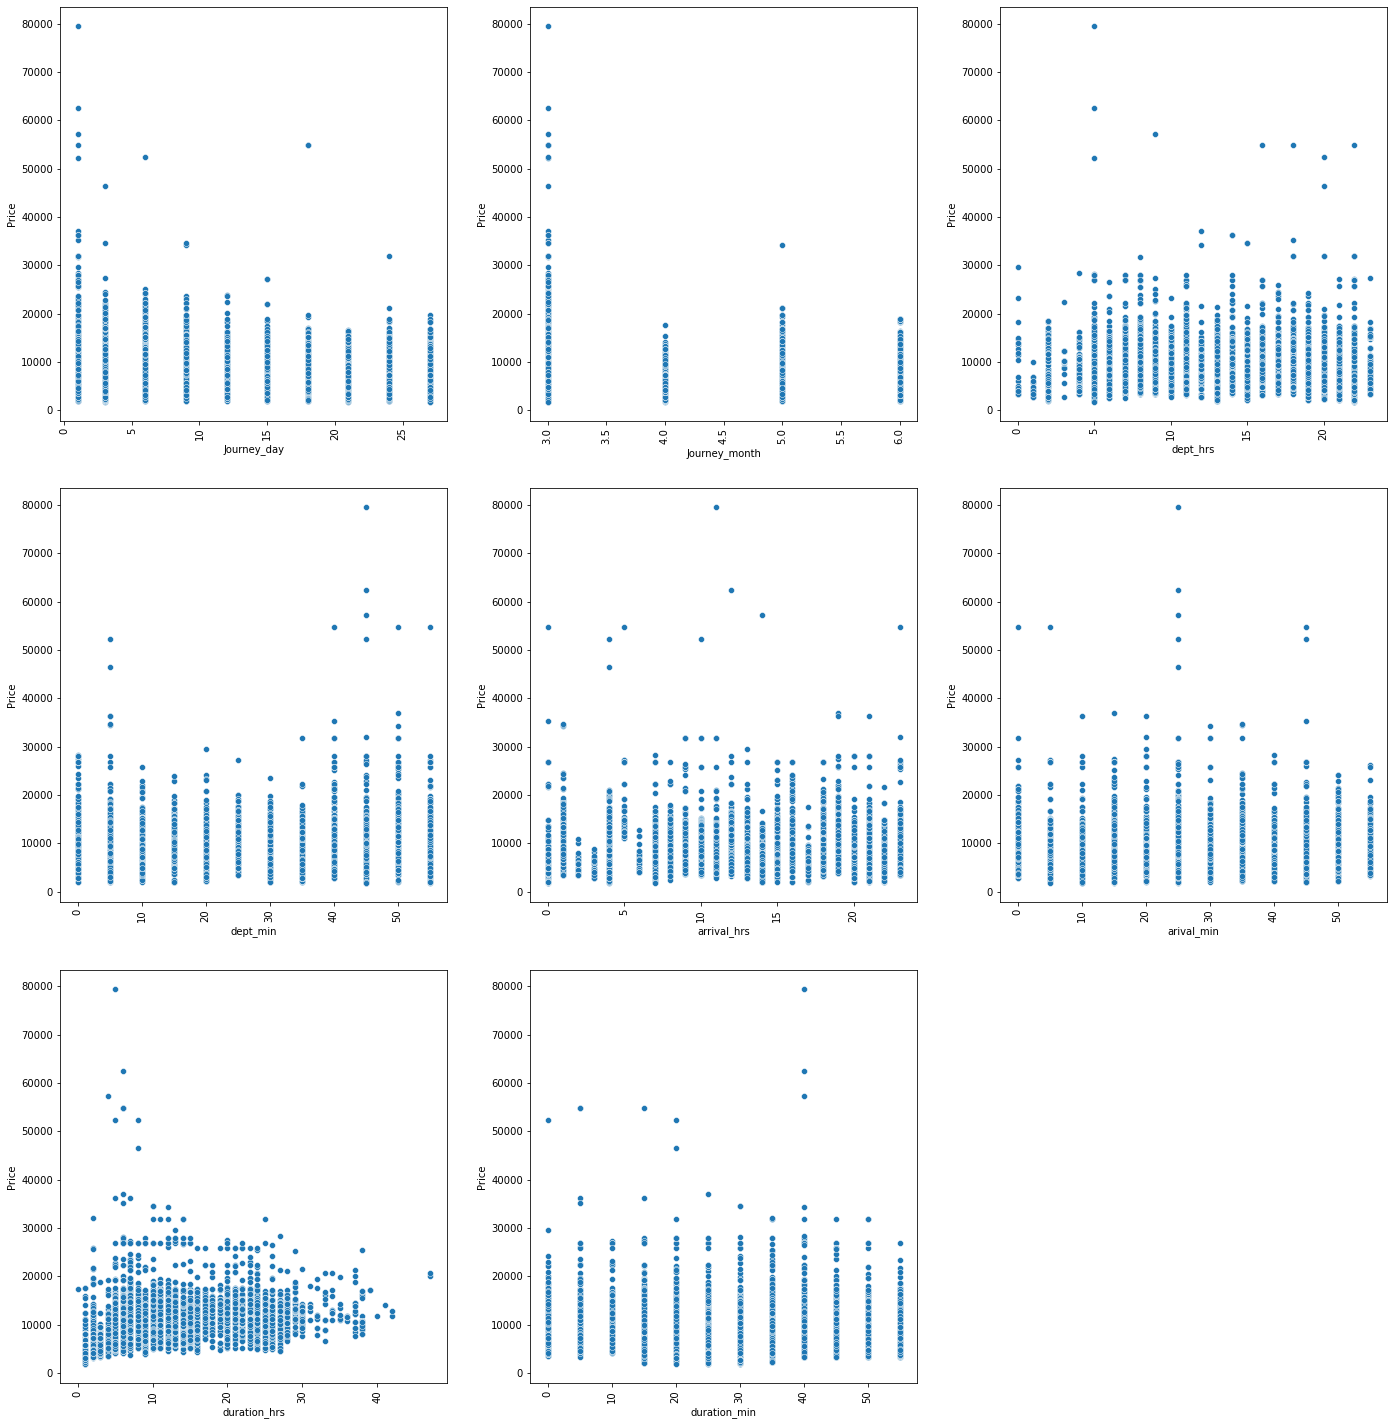

In [29]:
z=1
plt.figure(figsize=(20,40))

for c in numerical:
    plt.subplot(6,3,z)
    sns.scatterplot(x = train[c] , y = train.Price , marker = 'o')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    z= z + 1
plt.show()

#### Observation made from above plots :-

• Ticket price of flights are low at end of the month.                                
• Price of flights are high in March month.                                                                         
• Price are slightly less in early morning.                                                            
• As duration of flight increases price of ticket decreases.

## Outlier detection

In [30]:
outlier_detection = ['Price' , 'Journey_day', 'Journey_month', 'dept_hrs', 'dept_min',
                    'arrival_hrs', 'arival_min', 'duration_hrs', 'duration_min']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

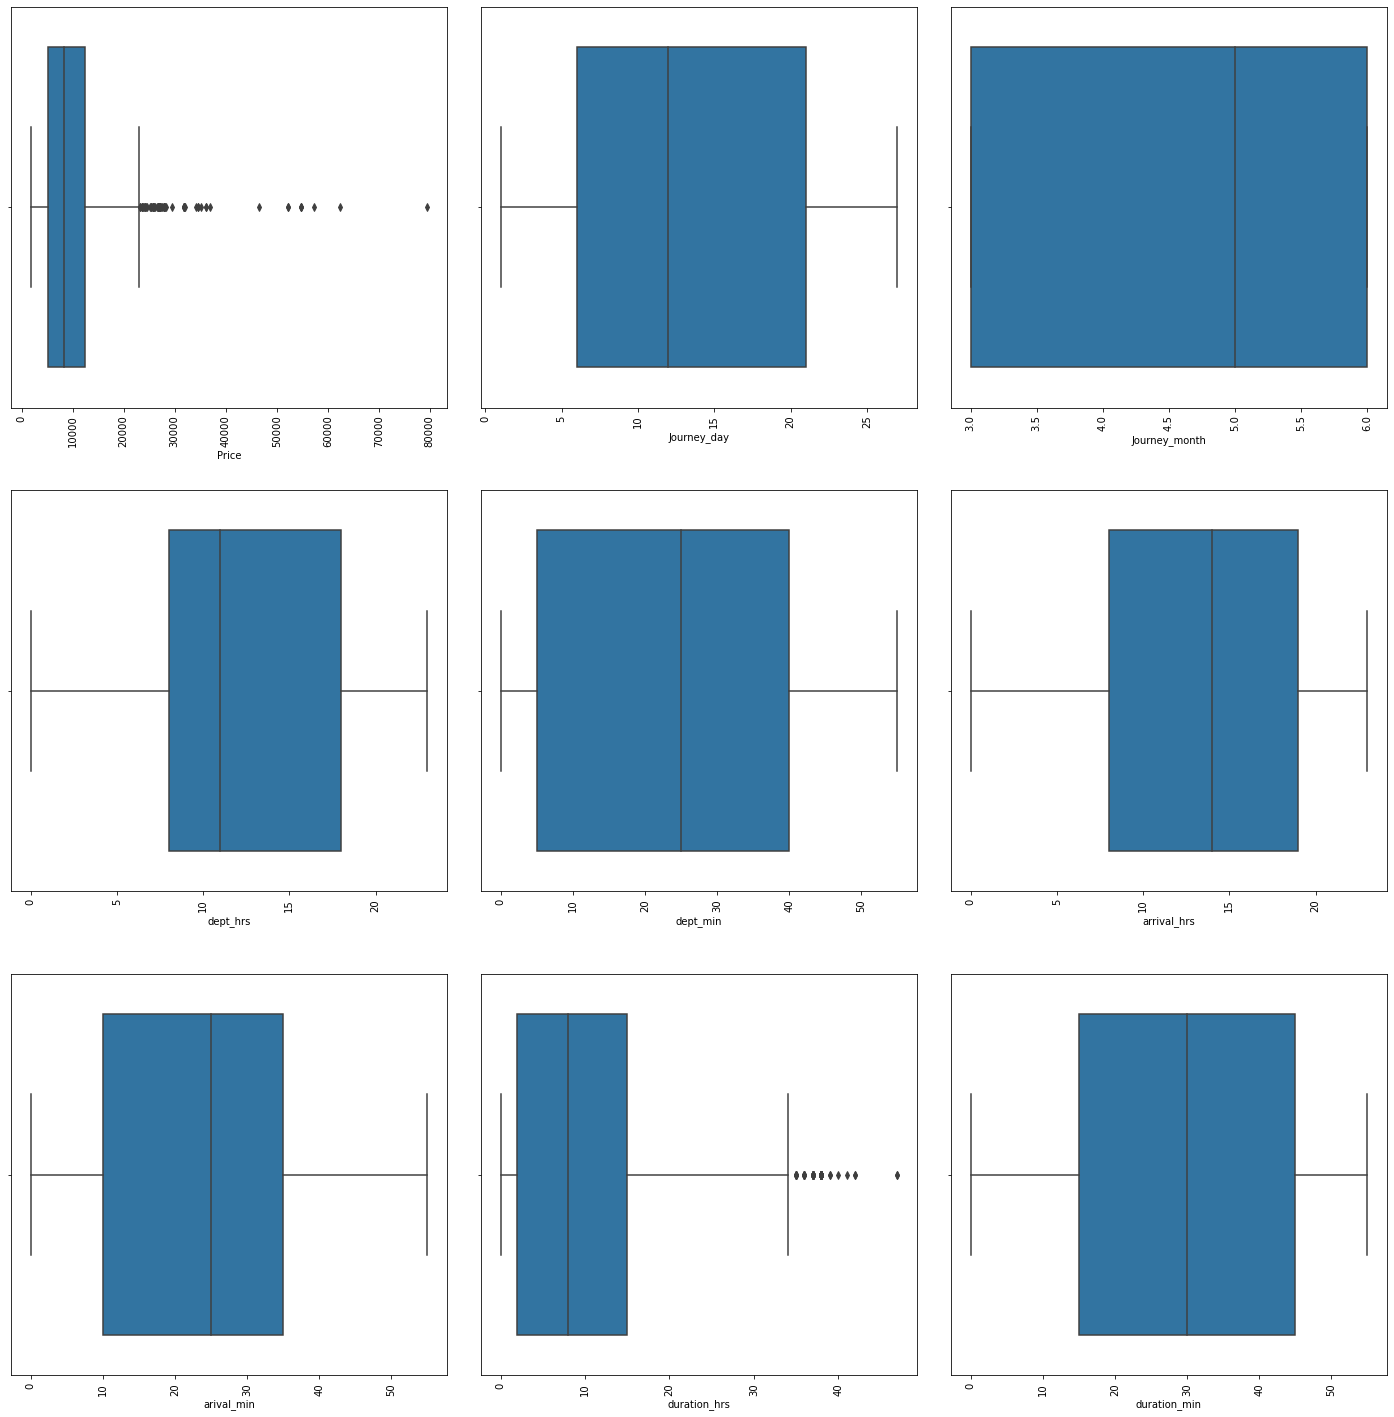

In [31]:
a=1
plt.figure(figsize=(20,40))

for i in outlier_detection:
    plt.subplot(6,3,a)
    sns.boxplot(train[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    a= a+1
plt.show()

#### Observation made from above plot :-

• Outlier present in Price and duration_hrs.                                                             
• We will not remove the data with high number of duration_hrs, increase in number of hours shows a price pattern in the above graphs plotted for EDA.

## Checking Missing Values

In [32]:
train.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      1
Price            0
Journey_day      0
Journey_month    0
dept_hrs         0
dept_min         0
arrival_hrs      0
arival_min       0
duration_hrs     0
duration_min     0
dtype: int64

In [33]:
train = train.dropna()

In [34]:
train.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Price            0
Journey_day      0
Journey_month    0
dept_hrs         0
dept_min         0
arrival_hrs      0
arival_min       0
duration_hrs     0
duration_min     0
dtype: int64

## Encoding the Categorical data

In [35]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train.Total_Stops.replace({'non-stop':0 , '1 stop':1 , '2 stops': 2 , '3 stops': 3 , '4 stops': 4} , inplace = True)

In [37]:
train.Airline.replace({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5,
                      'Air Asia':6, 'GoAir':7, 'Multiple carriers Premium economy':8, 'Jet Airways Business':9,
                       'Vistara Premium economy':10, 'Trujet':11},inplace = True)

In [38]:
train.Source.replace({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4}, inplace = True)

In [39]:
train.Destination.replace({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4, 'Kolkata':5}, inplace = True)

Our transformed data looks like -->

In [40]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dept_hrs,dept_min,arrival_hrs,arival_min,duration_hrs,duration_min
0,1,2,3,0,3897,24,3,22,20,1,10,2,50
1,2,1,1,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,1,1,1,1,6218,12,5,18,5,23,30,5,25
4,1,2,3,1,13302,1,3,16,50,21,35,4,45


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        10682 non-null  int64
 1   Source         10682 non-null  int64
 2   Destination    10682 non-null  int64
 3   Total_Stops    10682 non-null  int64
 4   Price          10682 non-null  int64
 5   Journey_day    10682 non-null  int32
 6   Journey_month  10682 non-null  int32
 7   dept_hrs       10682 non-null  int64
 8   dept_min       10682 non-null  int64
 9   arrival_hrs    10682 non-null  int64
 10  arival_min     10682 non-null  int64
 11  duration_hrs   10682 non-null  int64
 12  duration_min   10682 non-null  int64
dtypes: int32(2), int64(11)
memory usage: 1.1 MB


In [42]:
train.shape

(10682, 13)

## Heatmap

<AxesSubplot:>

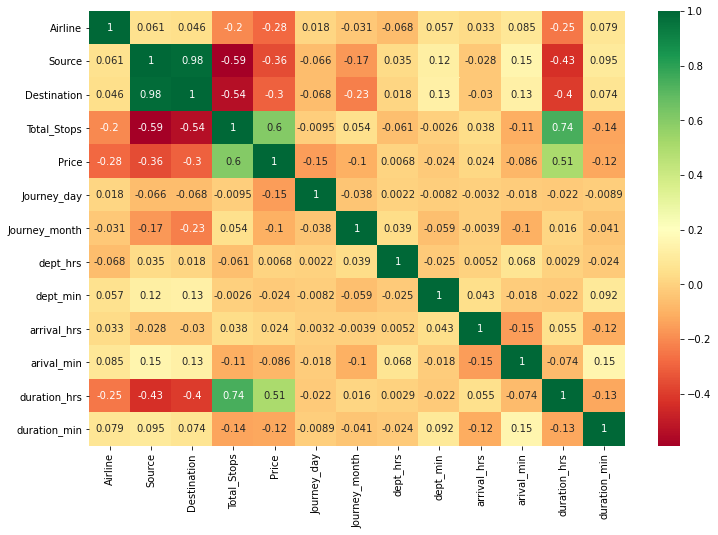

In [43]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

Now we are seperating **independant features** as **x** and **dependent feature** as **y**

In [44]:
x = train.drop(['Price'],axis=1)
y = train.Price

In [45]:
x.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dept_hrs,dept_min,arrival_hrs,arival_min,duration_hrs,duration_min
0,1,2,3,0,24,3,22,20,1,10,2,50
1,2,1,1,2,1,5,5,50,13,15,7,25
2,0,0,0,2,9,6,9,25,4,25,19,0
3,1,1,1,1,12,5,18,5,23,30,5,25
4,1,2,3,1,1,3,16,50,21,35,4,45


## Now we will do same preprocessing steps with test dataset

In [46]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
# date of journey
test.Date_of_Journey = test.Date_of_Journey.str.split('/')
test['Journey_day'] = test.Date_of_Journey.str[0].astype('int')
test['Journey_month'] = test.Date_of_Journey.str[1].astype('int')
# Now drop date of journy column
test = test.drop(['Date_of_Journey'] , axis=1)

# extracting departure time
test['dept_hrs'] = pd.to_datetime(test.Dep_Time).dt.hour
# extracting arrival minutes
test['dept_min'] = pd.to_datetime(test.Dep_Time).dt.minute
# Now drop dept_time column as it of no use now
test = test.drop(['Dep_Time'] , axis=1)

#extracting arrival time
test['arrival_hrs'] = pd.to_datetime(test.Arrival_Time).dt.hour
# extracting arrival minutes
test['arival_min'] = pd.to_datetime(test.Arrival_Time).dt.minute
# Now drop Arrival_Time column as it of no use now
test = test.drop(['Arrival_Time'] , axis=1)


# Duration means its differance between departure and arrival time
# Assigning and converting Duration column into list
duration = list(test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
test['duration_hrs'] = duration_hours
test['duration_min'] = duration_mins
# Now drop Duration column as it is of no use now
test = test.drop(['Duration'] , axis=1)

# route and total stop gives same information so we are deleting route column.
test = test.drop(['Route' , 'Additional_Info'] , axis=1)

# Categorical to numeric conversion
test.Total_Stops.replace({'non-stop':0 , '1 stop':1 , '2 stops': 2 , '3 stops': 3 , '4 stops': 4} , inplace = True)

test.Airline.replace({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5,
                      'Air Asia':6, 'GoAir':7, 'Multiple carriers Premium economy':8, 'Jet Airways Business':9,
                       'Vistara Premium economy':10, 'Trujet':11},inplace = True)

test.Source.replace({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4}, inplace = True)

test.Destination.replace({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4, 'Kolkata':5}, inplace = True)


In [48]:
test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dept_hrs,dept_min,arrival_hrs,arival_min,duration_hrs,duration_min
0,0,0,0,1,6,6,17,30,4,25,10,55
1,1,1,1,1,12,5,6,20,10,20,4,0
2,0,0,0,1,21,5,19,15,19,0,23,45
3,3,0,0,1,21,5,8,0,21,0,13,0
4,6,2,2,0,24,6,23,55,2,45,2,50


In [49]:
test.shape

(2671, 12)

## Sampling

Before building model, we should split our data into train and test data from which we **build model on train data** and **evaluate that model on basis of test data**

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=123)

In [52]:
print(x_train.shape)
print(y_train.shape)
print('-'*25)
print(x_test.shape)
print(y_test.shape)

(8545, 12)
(8545,)
-------------------------
(2137, 12)
(2137,)


## Model building

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [54]:
# creating instances
linreg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()
knn = KNeighborsRegressor()

In [55]:
for m in [linreg , dt , rf , svm , knn]:
    m.fit(x_train , y_train)
    pred = m.predict(x_test)
    train_score = m.score(x_train , y_train)
    test_score = r2_score(y_test , pred)
    print(m)
    print('R2 score is :- ',test_score)
    print('R2 score for train is :- ', train_score)
    print('MAE is :- ',mean_absolute_error(y_test , pred))
    print('MSE is :- ',mean_squared_error(y_test, pred))
    print('RMSE is :- ',np.sqrt(mean_squared_error(y_test, pred)))
    print('-'*50)

LinearRegression()
R2 score is :-  0.4538133656332146
R2 score for train is :-  0.4479537331157286
MAE is :-  2338.1467040864295
MSE is :-  10517193.715857532
RMSE is :-  3243.0223119580187
--------------------------------------------------
DecisionTreeRegressor()
R2 score is :-  0.7344649743976241
R2 score for train is :-  0.9700475836916205
MAE is :-  1292.061121509905
MSE is :-  5113056.832383014
RMSE is :-  2261.206941521057
--------------------------------------------------
RandomForestRegressor()
R2 score is :-  0.8354611862975067
R2 score for train is :-  0.9530060695490385
MAE is :-  1113.8119745073338
MSE is :-  3168306.3418289865
RMSE is :-  1779.973691330573
--------------------------------------------------
SVR()
R2 score is :-  0.017778971176630964
R2 score for train is :-  0.005296939775547682
MAE is :-  3419.11992010768
MSE is :-  18913331.41811581
RMSE is :-  4348.946012324804
--------------------------------------------------
KNeighborsRegressor()
R2 score is :-  0.646

#### Observation We made from above :- 

• **SVM** gives worst result for this problem statment .                                                                                                    
• **Linear regression** also not that much good as it gives almost 45% r2 score on train and test data with higher RMSE value.          
• **KNN** algorithm gives slightly better result than Linear Regression.                                               
• **Decission Tree** gives better r2 on train as well as test with less RMSE.                                                  
• **RandomForest** is bestest model here, as we got better r2 score and minimun RMSE.

So ,we choose **Random Forest** algorithm for predicting flight price.
As we can see for Random Forest is giving slightly overfitting result on train data, so we have to hypertuning

## Hypertuning 

**RandomizedSearchCV** is a technique used to validate the model with different parameter combinations, by creating a grid of parameters and trying all the combinations to compare which combination gave the best results

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [59]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               cv = 5, verbose=2)

In [60]:
a = rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  16.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  17.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  16.4s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  16.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   9.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=  10.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=  10.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   9.5s
[CV] END ma

In [61]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 15}

In [62]:
prediction = a.predict(x_test)

In [63]:
print('R2 score :- ',r2_score(y_test , prediction))
print('R2 score for train is :- ',r2_score(y_train, a.predict(x_train)))
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

R2 score :-  0.8660685684411942
R2 score for train is :-  0.9110591094372091
MAE: 1065.7806556917562
MSE: 2578940.4604876484
RMSE: 1605.907986307948


After Hypertuning our RandomForest model gives better result than previous one, r2 score is increases and RMSE descreases.

## Saving Model

In [64]:
import pickle

file = open('flight_price.pkl' , 'wb')

# dump information to that file
pickle.dump(rf_random, file)

Thus model has been saved.

## Now lets check error in x_train and y_train

In [65]:
error_train = y_train - a.predict(x_train)    # error = actual - prediction

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

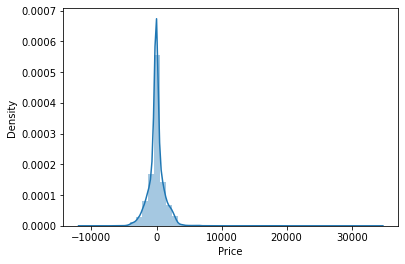

In [66]:
sns.distplot(error_train)

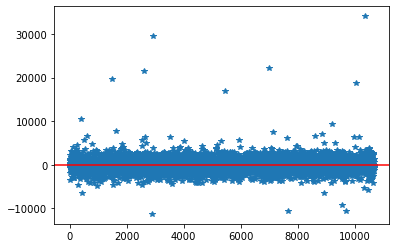

In [67]:
plt.plot(error_train , '*')
plt.axhline(np.mean(error_train) , color = 'r')

In [68]:
df = pd.DataFrame({'Actual': y_test , 'Predicted':prediction })

In [69]:
df.head()

,Actual,Predicted
10435,8996,8269.390992
8619,15400,17216.533605
6445,10844,13317.948428
3159,4423,3915.641320
9866,13339,10385.557687


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

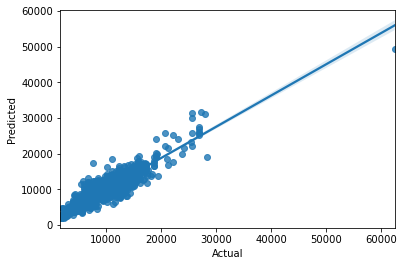

In [70]:
sns.regplot(x = 'Actual' , y='Predicted' , data = df)

## Now we are predicting price for test dataset

In [71]:
# Loading saved model

model = open('flight_price.pkl','rb')
forest = pickle.load(model)

In [73]:
prices = forest.predict(test)

In [74]:
prices

array([11458.74400557,  4230.01994378, 14586.95375902, ...,
       14823.73680521, 14518.31152579,  8242.54372278])

In [75]:
# converting prices into dataframe format
price_df = pd.DataFrame({'Price':prices})

In [76]:
price_df

,Price
0,11458.744006
1,4230.019944
2,14586.953759
3,11029.200272
4,3773.891230
...,...
2666,10134.606765
2667,4791.238879
2668,14823.736805
2669,14518.311526


## --- End Of Notebook ---